In [89]:
import os
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

In [128]:
dir_path = "../output/jester-2017-06-17-16h28m48s//"

In [129]:
metrics = pd.DataFrame.from_csv(f"{dir_path}/output.csv")
metrics

,metric,cutoff,fold,source,value
0,EPC,10,1,BPRSLIM,0.611553
1,EPC,10,1,BordaCount,0.563829
2,EPC,10,1,CRF,0.567734
3,EPC,10,1,CoFactor,0.724837
4,EPC,10,1,CofiRank,0.703492
5,EPC,10,1,CoordinateAscent,0.566957
6,EPC,10,1,FISM_librec,0.651327
7,EPC,10,1,GPRA_best,0.570595
8,EPC,10,1,Hybrid_librec,0.520561
9,EPC,10,1,ItemKNN,0.650923


In [130]:
recommenders = ['BPRSLIM', 'CofiRank', 'Hybrid_librec', 'LDA_librec', 'libfm',
                'MultiCoreBPRMF', 'RankALS_librec', 'WRMF', 'CoFactor', 'FISM_librec',
                'ItemKNN', 'LeastSquareSLIM', 'MostPopular', 'Poisson', 'SoftMarginRankingMF']
unsup_agg = ['BordaCount', 'MedianRankAggregation']
source_category = {
    source: 'recommender' if source in recommenders else
            'unsup_agg' if source in unsup_agg else
            'sup_agg'
    for source in metrics.source.unique()
}

In [131]:
def mean_value_by_metric(metric_name):
    eild_values = metrics[metrics.metric == metric_name][['fold', 'source', 'value']]
    return eild_values.groupby('source').mean().value

In [132]:
mean_metrics = pd.DataFrame({'map': mean_value_by_metric('MAP'), 'eild': mean_value_by_metric('EILD'), 'epc': mean_value_by_metric('EPC')})
mean_metrics['source_category'] = [source_category[source] for source in mean_metrics.index]
mean_metrics = mean_metrics.sort_values(by='source_category')
mean_metrics.to_csv(f'{dir_path}/mean_metrics.csv')
mean_metrics

,eild,epc,map,source_category
source,,,,
BPRSLIM,0.428446,0.595335,0.272065,recommender
SoftMarginRankingMF,0.375830,0.656160,0.189415,recommender
RankALS_librec,0.374960,0.684568,0.204622,recommender
Poisson,0.456425,0.576931,0.261636,recommender
MultiCoreBPRMF,0.413039,0.620602,0.273030,recommender
MostPopular,0.512077,0.511426,0.266422,recommender
LeastSquareSLIM,0.482421,0.532734,0.274029,recommender
WRMF,0.413232,0.621464,0.282315,recommender
ItemKNN,0.395223,0.644014,0.248026,recommender


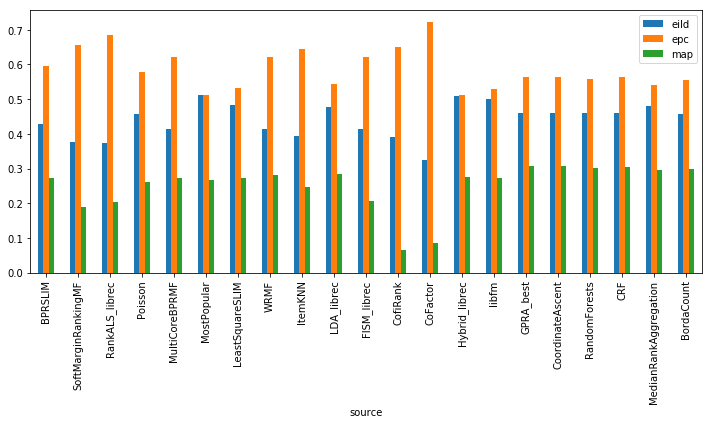

In [133]:
plt.clf()
bar_plot = mean_metrics.plot(kind='bar')
plt.tight_layout()
plt.savefig(f'{dir_path}/mean_metrics_bar_plot.pdf')

In [134]:
def scatter_plot_by_source_category(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ['r', 'g', 'b']
    for (category, frame), color in zip(mean_metrics.groupby('source_category'), colors):
        scatter_plot = frame.plot.scatter(x, y, c=color, label=category, ax=ax)

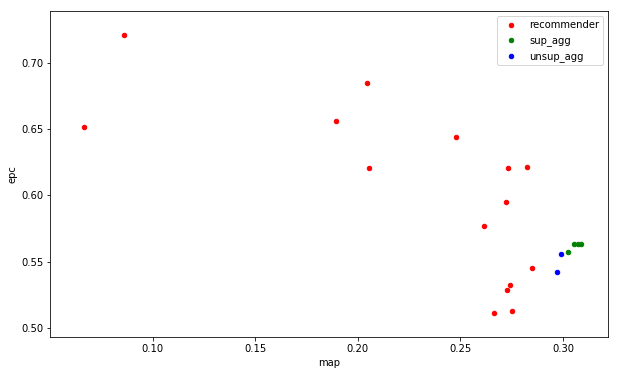

In [135]:
plt.clf()
scatter_plot_by_source_category('map', 'epc')
plt.savefig(f"{dir_path}/epc_by_map_scatter_plot.pdf")

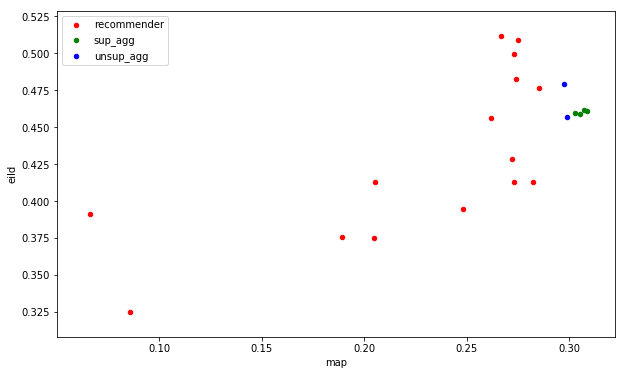

In [136]:
plt.clf()
scatter_plot_by_source_category('map', 'eild')
plt.savefig(f"{dir_path}/eild_by_map_scatter_plot.pdf")